<a href="https://colab.research.google.com/github/raneAshutoshDs21/Integrated-Store-Optimization-Forecasting-Sales/blob/main/Store_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrated Retail Analytics and Store Optimization**


---
Project Type: Advanced ML

Contribution: Individual (Ashutosh Rane)



Streamlit Link:
https://integrated-store-optimization-forecasting-sales-st3vybltwtqs5h.streamlit.app/

### **Problem Statement:**


---
To utilise Machine learning & Data Analysis Techniques to optimize store performance, forecast demand/sales and enhance customer experience through segmentation.



### **Project Summary:**


---
**Phase 1: Data Cleaning & Feature Engineering**

* Merged datasets to create a unified view

* Handled missing values, especially in markdown columns

* Converted IsHoliday from boolean to binary for modeling

* Extracted date-based features like year, month, and week

* Engineered features to better capture effects of markdowns and holidays

**Phase 2: Time Series & Seasonal Analysis**

* Visualized weekly sales trends

* Identified seasonal patterns and holiday effects

* Analyzed differences across stores and departments

* Found peaks around major holidays like Christmas and Thanksgiving

**Phase 3: Clustering & Product Association**

* Used K-Means clustering to segment:

* Stores based on markdown usage and average sales

* Departments based on sales patterns and markdown sensitivity

* Inferred product associations within departments based on co-occurring sales patterns

* Developed cross-selling ideas based on department behavior

**Phase 4: Forecasting Models**

* Short-Term Forecasting
Used current week economic and markdown features

 *  Model: XGBoost Regressor

    Results:

    RMSE: ~6864

* Suitable for week-ahead forecasting

* Long-Term Forecasting

Incorporated date features, economic factors, markdowns, and store/department attributes

* Models: Random Forest and XGBoost

 *    Results:

    RMSE: ~6080

    R² Score: ~0.89

* Suitable for monthly/quarterly business planning
---
**Streamlit App**

Developed a web app with:

Sidebar inputs for all key features

Dynamic prediction based on user inputs

Optional forecast visualization (bar chart)

Clean, modern layout ready for deployment









# **1. Loading Basic Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose

# **2. Loading the Datasets**

In [ ]:
df_feat=pd.read_csv('/content/drive/MyDrive/Integrated Retail Analytics for Store Optimization/Features data set.csv')
df_sales=pd.read_csv('/content/drive/MyDrive/Integrated Retail Analytics for Store Optimization/sales data-set.csv')
df_stores=pd.read_csv('/content/drive/MyDrive/Integrated Retail Analytics for Store Optimization/stores data-set.csv')

# **3. Analysing the Datasets**

In [ ]:
df_feat

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
df_sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_feat.isnull().sum()

,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [ ]:
df_feat.dtypes

,0
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [ ]:
df_sales.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


In [ ]:
df_sales.dtypes

,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool


In [ ]:
df_stores.isnull().sum()

,0
Store,0
Type,0
Size,0


In [ ]:
df_stores.dtypes

,0
Store,int64
Type,object
Size,int64


In [ ]:
df_stores['Type'].value_counts()

,count
Type,
A,22
B,17
C,6


# **4. Data Cleaning & Preprocessing**

In [ ]:
df_feat['Date'] = pd.to_datetime(df_feat['Date'], format='%d/%m/%Y')
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d/%m/%Y')

In [ ]:
# Merge sales with features on Store, Date, and IsHoliday
merged_df = pd.merge(df_sales,df_feat, on=['Store', 'Date', 'IsHoliday'], how='left')

In [ ]:
# Merge with store info on Store
merged_df = pd.merge(merged_df, df_stores, on='Store', how='left')

In [ ]:
# Fill missing markdowns with 0 (assumption: no markdown activity)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
merged_df[markdown_cols] = merged_df[markdown_cols].fillna(0)

In [ ]:
# Sort for group-wise filling
merged_df.sort_values(['Store', 'Date'], inplace=True)

In [ ]:
# Fill CPI and Unemployment forward and backward within each store
merged_df['CPI'] = merged_df.groupby('Store')['CPI'].transform(lambda x: x.ffill().bfill())
merged_df['Unemployment'] = merged_df.groupby('Store')['Unemployment'].transform(lambda x: x.ffill().bfill())

# **5. Feature Engineering for Time Series Analysis**

In [ ]:
# Date-based features
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Season'] = merged_df['Month'] % 12 // 3 + 1  # 1:Winter, 2:Spring, 3:Summer, 4:Monsoon

In [ ]:
# Lag Feature: Previous week's sales
merged_df['Lag_1'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

In [ ]:
# Aggregate features: Mean sales per store and department
merged_df['Mean_Weekly_Sales_Store'] = merged_df.groupby('Store')['Weekly_Sales'].transform('mean')
merged_df['Mean_Weekly_Sales_Dept'] = merged_df.groupby('Dept')['Weekly_Sales'].transform('mean')

In [ ]:
# Anomaly Detection using Z-Score
merged_df['Sales_Z_Score'] = merged_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)
merged_df['Is_Anomaly'] = np.abs(merged_df['Sales_Z_Score']) > 3

In [ ]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Year,Month,Week,Day,Season,Lag_1,Mean_Weekly_Sales_Store,Mean_Weekly_Sales_Dept,Sales_Z_Score,Is_Anomaly
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,2010,2,5,5,1,NaN,21710.543621,19213.485088,0.245542,False
143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,2010,2,5,5,1,NaN,21710.543621,43607.020113,1.313408,False
286,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,2010,2,5,5,1,NaN,21710.543621,11793.698516,0.067943,False
429,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,2010,2,5,5,1,NaN,21710.543621,25974.630238,1.023782,False
572,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,2010,2,5,5,1,NaN,21710.543621,21365.583515,0.706024,False


# **6. Data & Time Series Analysis**

In [ ]:
sns.set(style="whitegrid")

# Step 1: Choose a Store and Department for Decomposition
example_store = 1
example_dept = 1

# Filter and prepare time series for one store and department
ts_df = merged_df[(merged_df['Store'] == example_store) & (merged_df['Dept'] == example_dept)].copy()
ts_df.set_index('Date', inplace=True)
ts_df.sort_index(inplace=True)

# Weekly resample to fill any missing time gaps (fill with 0 for completeness)
ts_weekly_sales = ts_df['Weekly_Sales'].resample('W-MON').sum().fillna(0)

In [ ]:
# Step 2: Decompose Time Series (Additive) ---
decomposition = seasonal_decompose(ts_weekly_sales, model='additive', period=52)

## **a) Sales Trend**

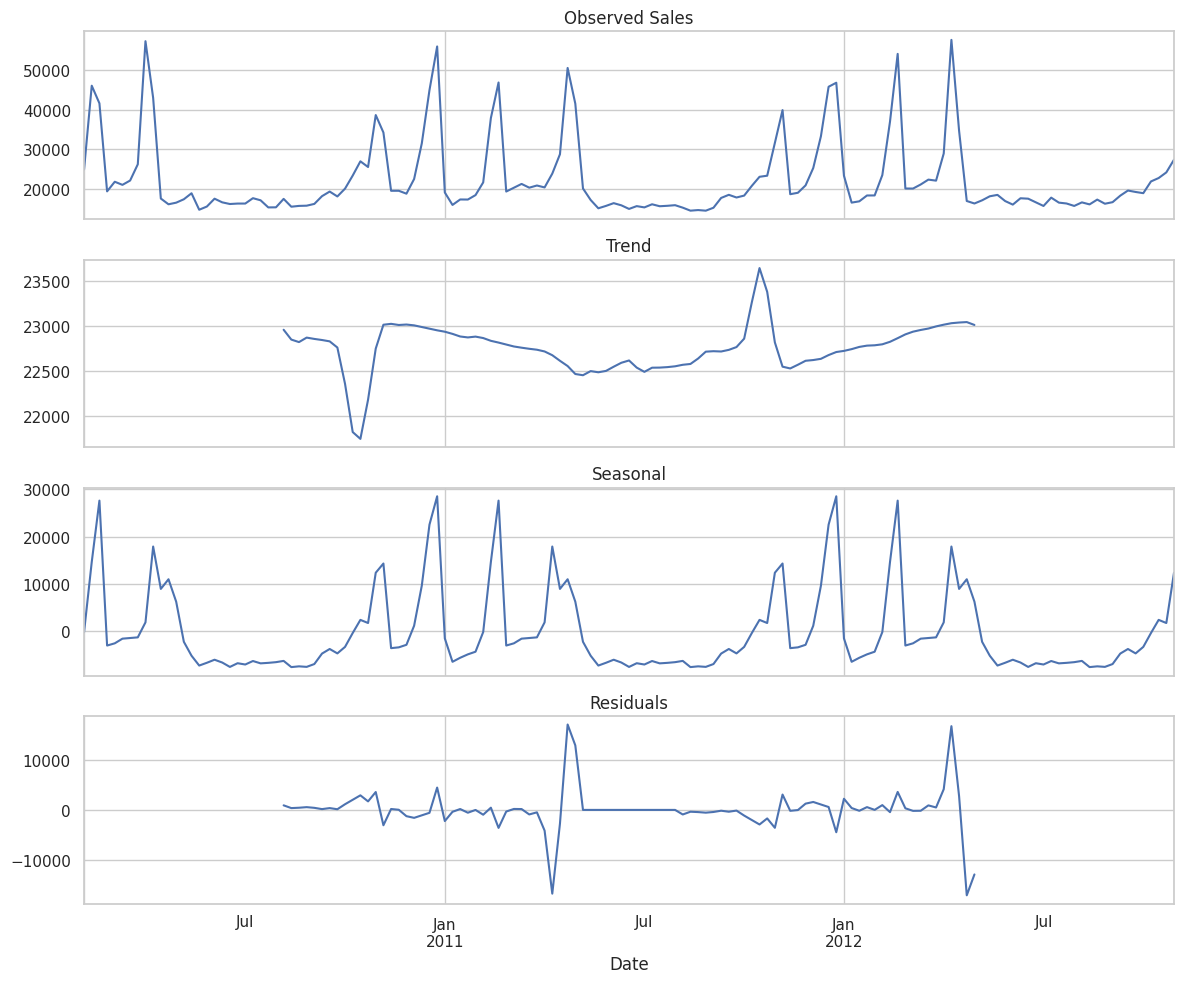

In [ ]:
#  Step 3: Plot Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed Sales')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

### **Insights from sales Trend**


---
**1. Observed Sales (The Big Picture):**

Sales definitely have their ups and downs. There are clear peaks, often reaching over 40000 and even hitting above 50,000 at times. It seems like sales are somewhat cyclical, with regular boosts.


**2. Trend (The Long Game):**

The underlying trend in sales is pretty interesting. For a while, it seems to dip, especially around early 2011, and then it generally starts to climb upwards. It's like, even with the short-term fluctuations, the overall direction of sales is slowly improving, or at least recovering from a dip.

**3. Seasonal (The Regular Rhythms):**

This is where we see the predictable patterns. There are very strong seasonal spikes in sales. These peaks seem to occur fairly regularly, suggesting there are specific times of the year (or perhaps even within a month, depending on the data granularity) when sales consistently jump. It's almost like a "holiday rush" or a "back-to-school boom" happening repeatedly.

**4.Residuals (The Surprises!):**

These are the bits that the "trend" and "seasonal" patterns can't explain. Most of the time, the residuals are pretty close to zero, meaning the trend and seasonal components do a good job of explaining the sales. However, there are a couple of big surprises:

Around early 2011, there's a significant drop in sales that wasn't predicted by the usual patterns (the negative spike).

Then, towards the end of 2011, there's a big positive spike, meaning sales were much higher than expected.

And finally, around mid-2012, another notable dip that wasn't part of the usual rhythm. These "residuals" are where you might want to dig deeper – perhaps there were special promotions, unexpected events, or external factors that caused these unpredicted ups and downs.


---




## **b) Weekly Sales Comparision Holiday V/s Non-Holiday**

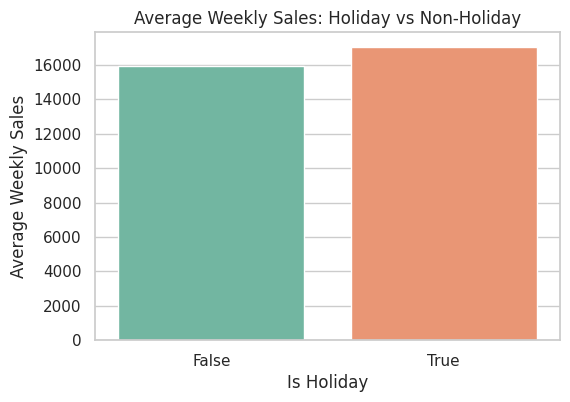

In [ ]:
# Step 4: Analyze Holiday Impact on Sales
holiday_effect = merged_df.groupby('IsHoliday')['Weekly_Sales'].mean()

# Plot average sales during holidays vs non-holidays
plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_effect.index, y=holiday_effect.values, palette='Set2')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.show()

### **Insights of Weekly Sales**


---
1. The green bar, labeled "False" under "Is Holiday," represents the average weekly sales when it's NOT a holiday. We can see this is around 16,000 units.

2. The orange bar, labeled "True" under "Is Holiday," shows the average weekly sales during a holiday period. This average is noticeably higher, closer to 17,000 units.


---


In simple terms, here's the key takeaway:

People tend to spend a bit more money during holiday weeks! On average, weekly sales are higher when it's a holiday compared to a regular, non-holiday week. This suggests that holidays are a good time for businesses to potentially boost their revenue.



## **c) Monthly Sales Patterns Analysis**

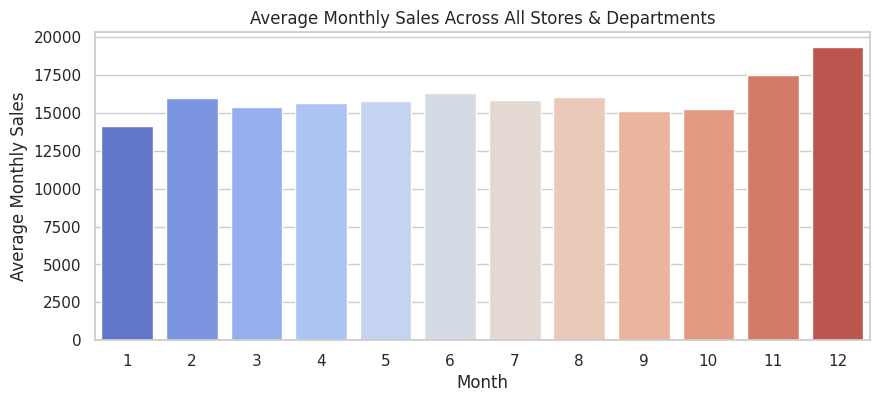

In [ ]:
# Step 5: Monthly Sales Pattern (Seasonality)
monthly_sales = merged_df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title('Average Monthly Sales Across All Stores & Departments')
plt.xlabel('Month')
plt.ylabel('Average Monthly Sales')
plt.show()

### **Monthly Sales Patterns Insights**


---
**A Slow Start, Then Steady:**

Sales seem to start off a bit slower in January (Month 1), hovering around 14,000 in average weekly sales.
Early Year Boost: There's a noticeable bump in February (Month 2), with sales jumping significantly.

**Spring & Summer Stability:**

From March through August (Months 3-8), sales are pretty consistent, staying in the range of roughly 15,000 to 16,000 in average weekly sales. There isn't a huge peak or valley during these months.

**Autumn Dip:**

Sales seem to dip slightly in September and October (Months 9-10), but then there's a clear and dramatic increase as the year winds down.

**The Holiday Rush is Real:**

The biggest story here is November (Month 11) and especially December (Month 12). Sales absolutely skyrocket in these months! December, in particular, hits the highest average weekly sales, nearing 20,000.

This strongly suggests that the end-of-year holiday season (like Diwali, Christmas, etc. in India, or similar global holidays) is the absolute strongest sales period for these stores and departments.

### **In Conclusion:**


---


While sales are relatively stable for most of the year, there's a clear and significant sales boom that happens towards the end of the year, peaking in December. This highlights the critical importance of holiday shopping periods for the business.

### **d) Department & Storewise Sales Trend**

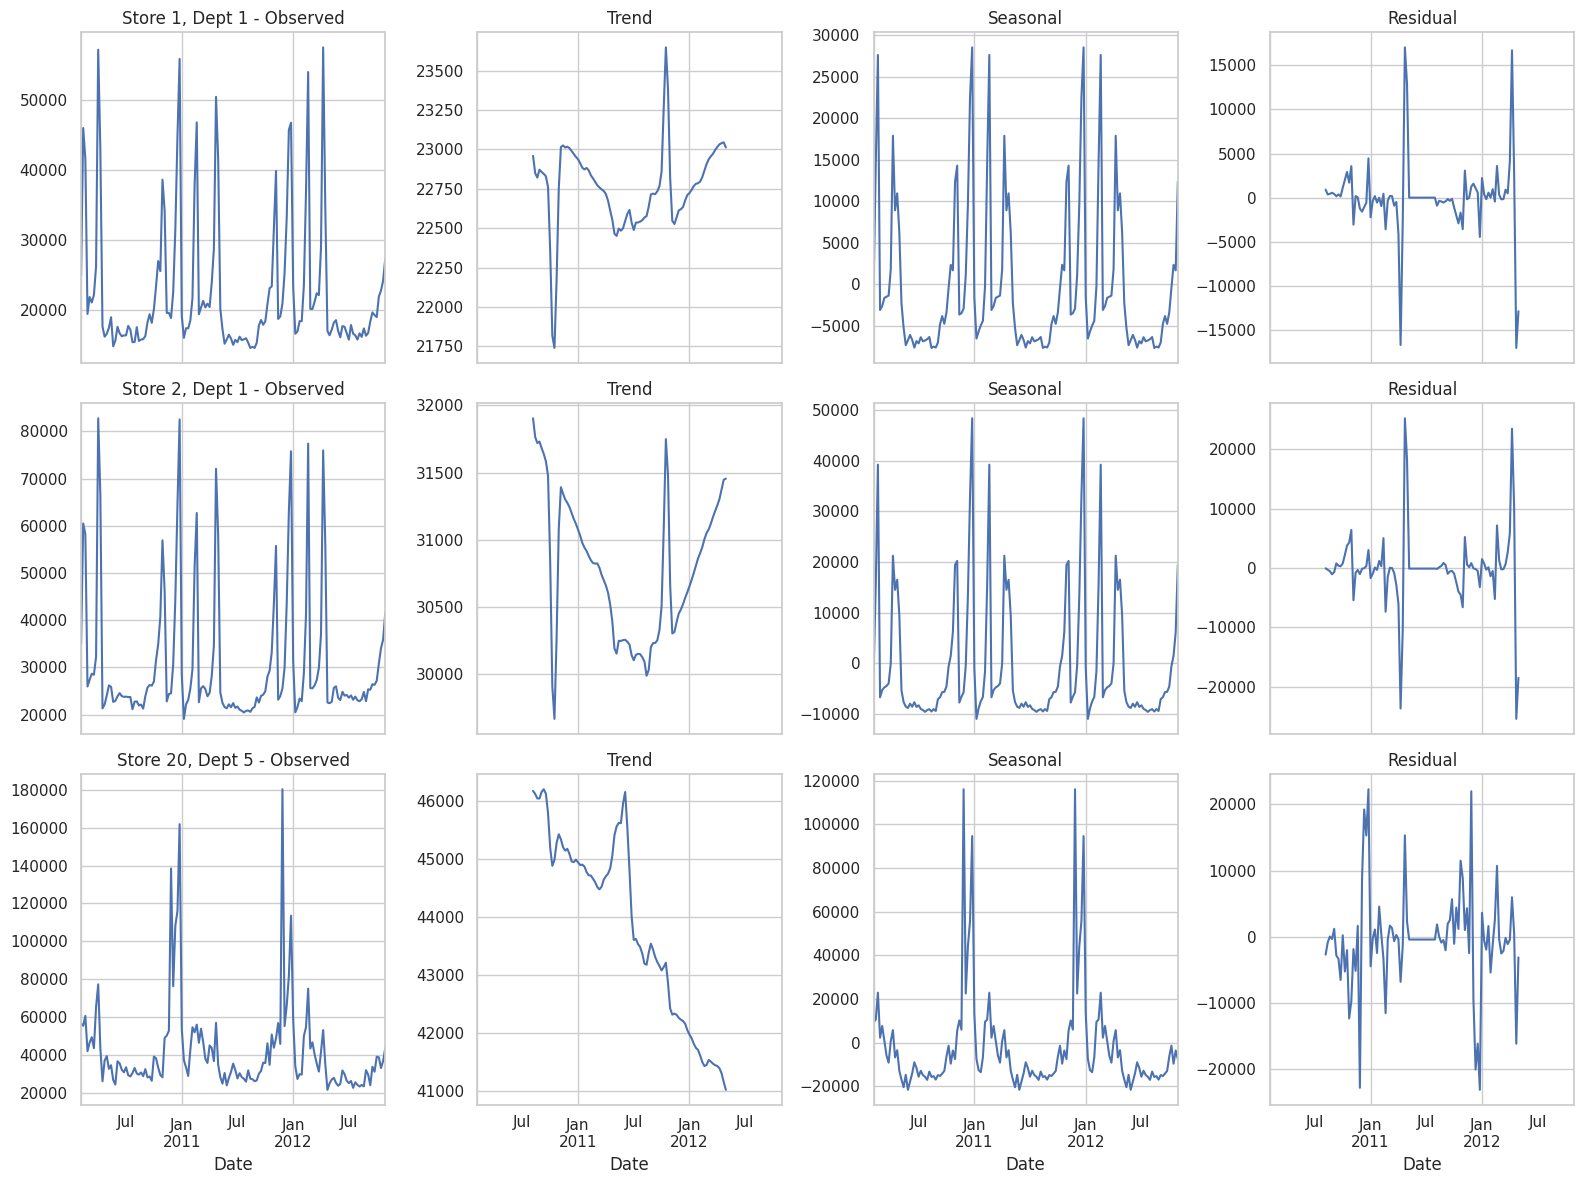

In [ ]:
# Define store-department pairs to analyze
example_pairs = [(1, 1), (2, 1), (20, 5)]

# Set up plotting grid
fig, axes = plt.subplots(len(example_pairs), 4, figsize=(16, 4 * len(example_pairs)), sharex='col')

# Loop through each store-dept pair
for i, (store, dept) in enumerate(example_pairs):
    # Filter for current store and department
    ts_df = merged_df[(merged_df['Store'] == store) & (merged_df['Dept'] == dept)].copy()
    ts_df.set_index('Date', inplace=True)
    ts_df.sort_index(inplace=True)

    # Weekly resampling with fill for gaps
    ts_weekly_sales = ts_df['Weekly_Sales'].resample('W-MON').sum().fillna(0)

    # Decompose the time series into trend, seasonal, and residual
    decomposition = seasonal_decompose(ts_weekly_sales, model='additive', period=52)

    # Plot each component
    decomposition.observed.plot(ax=axes[i, 0], title=f'Store {store}, Dept {dept} - Observed')
    decomposition.trend.plot(ax=axes[i, 1], title='Trend')
    decomposition.seasonal.plot(ax=axes[i, 2], title='Seasonal')
    decomposition.resid.plot(ax=axes[i, 3], title='Residual')

# Adjust layout
plt.tight_layout()
plt.show()

### **Deaprtment & Storewise Trends Insights**


---


Row 1: Store 1, Dept 1

Observed Sales (The Big Picture):

This store and department has sales that are quite volatile. There are frequent, sharp peaks where sales surge, often reaching over 40,000, followed by significant drops. This suggests very strong, regular periods of high activity.

Trend (The Long Game):

The underlying trend for Store 1, Dept 1, seems relatively flat, possibly with a slight upward drift over the observed period (mid-2010 to mid-2012). It's not experiencing a massive overall growth or decline, but more short-term fluctuations.

Seasonal (The Regular Rhythms): This is where the story is! The "Seasonal" component clearly shows very strong, predictable spikes. These spikes are recurring and are the primary driver of the peaks we see in the "Observed" sales. It's like clockwork – certain times of the year (or month, depending on the data frequency) consistently bring in big sales.

Residual (The Surprises!):
The residuals are generally close to zero, meaning the trend and seasonal patterns explain most of the sales. However, there are some notable deviations, both positive and negative, especially around late 2010 and early 2011. These are the unexpected moments not accounted for by the regular patterns.


---



Row 2: Store 2, Dept 1
Observed Sales (The Big Picture):

Sales here are even higher than Store 1, Dept 1, often pushing towards 80,000 during peak times. Similar to the first, it shows clear, strong peaks and valleys, indicating recurring periods of high sales activity.

Trend (The Long Game):

The trend for Store 2, Dept 1, is more dynamic. It starts relatively high, dips significantly around early 2011, and then recovers, showing a general upward trajectory again by mid-2012. This suggests a period of challenge followed by recovery or growth.

Seasonal (The Regular Rhythms):

Just like Store 1, this store and department also exhibits very strong seasonal patterns. The peaks here are even more pronounced, frequently hitting 40,000-50,000, indicating that predictable periods contribute hugely to their sales.

Residual (The Surprises!):

The residuals show some interesting patterns. There's a notable unpredicted dip around early 2011 and a few unpredicted spikes and dips thereafter. These indicate moments where sales performed significantly better or worse than what the underlying trend and seasonal cycles would suggest.


---



Row 3: Store 20, Dept 5
Observed Sales (The Big Picture):

This is the biggest performer of the three, with sales frequently reaching over 100,000 and even close to 180,000 during peaks! Like the others, it has very strong, recurring sales surges.
Trend (The Long Game):

The trend for Store 20, Dept 5, is quite different. It starts very high (around 46,000) and then shows a clear and steady decline throughout the period. This indicates an underlying challenge or decreasing overall sales momentum for this specific store and department.

Seasonal (The Regular Rhythms):

Despite the declining trend, the seasonal patterns are incredibly strong and visually the most dominant feature for this entity. The regular spikes are massive, often exceeding 100,000. This means that even with an overall downward trend, there are still predictable times when sales absolutely explode.

Residual (The Surprises!):

The residuals for Store 20, Dept 5, also show significant unpredicted movements. There's a large positive spike around early 2011, followed by several notable positive and negative deviations. These "surprises" are quite large in magnitude, hinting at significant external factors or unique events impacting sales beyond the regular patterns.

---
Seasonality is King (or Queen):

Across all three examples, predictable seasonal patterns are the most powerful force driving sales peaks. Businesses with this kind of data must understand and leverage these seasonal boosts.
Trends Tell the Health Story:

Store 1, Dept 1, seems relatively stable in the long run.
Store 2, Dept 1, is on a good recovery path after an earlier dip.
Store 20, Dept 5, despite its huge peaks, has a concerning underlying downward trend.

This is a red flag – even though it has massive sales moments, its general direction is decline. Management should investigate why this is happening.

# **7. Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Aggregate sales and markdowns per store
store_agg = merged_df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Size': 'mean'
}).reset_index()

In [ ]:
# --- Standardize features for clustering ---
features_to_cluster = store_agg.drop('Store', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_to_cluster)

In [ ]:
# --- Apply KMeans ---
kmeans = KMeans(n_clusters=3, random_state=1)
store_agg['Cluster'] = kmeans.fit_predict(X_scaled)

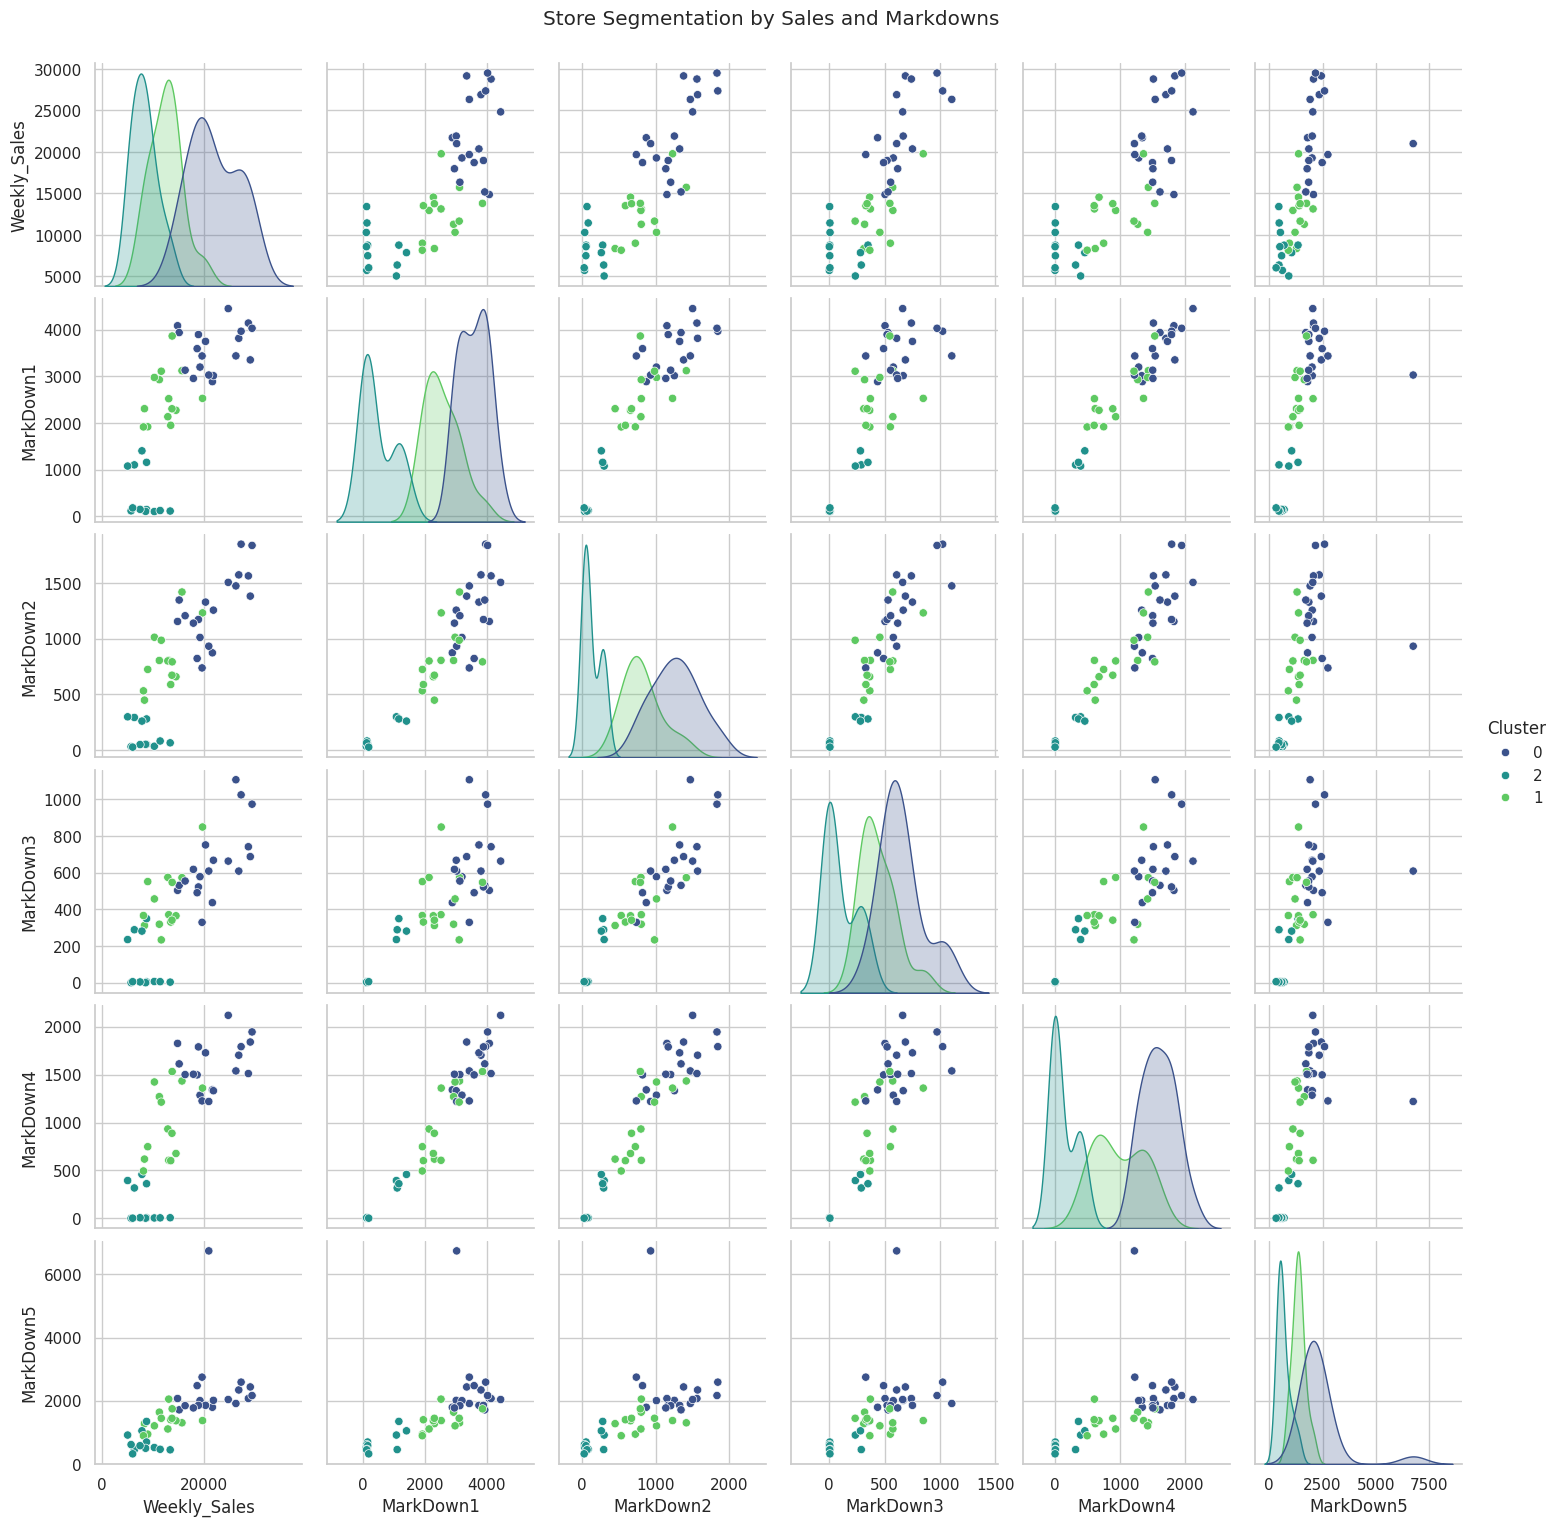

In [ ]:
# Prepare dataframe for visualization
store_plot_df = store_agg.copy()
store_plot_df['Cluster'] = store_agg['Cluster'].astype(str)  # for color categories

# Include only relevant columns
plot_features = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Cluster']

# Use seaborn pairplot
sns.pairplot(store_plot_df[plot_features], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Store Segmentation by Sales and Markdowns", y=1.02)
plt.show()

### **a) Store Segmentation by Sales & Markdown**


---

Understanding the Grid:

Each row and column represents a different variable:

**Weekly_Sales (the total sales in a week):**

MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 (these likely represent different types of markdowns, or markdowns applied to different categories, or perhaps just different phases/buckets of discounting).

**The Diagonal Plots (Density Plots):**

These plots (the ones with shaded curves) show the distribution of each variable. For example, the top-left plot for Weekly_Sales shows where most stores' weekly sales fall. The different colors (purple/blue and green) represent the two "clusters" of stores.

**The Off-Diagonal Plots (Scatter Plots):**

These are the most interesting! Each scatter plot shows the relationship between two variables. For example, the plot in the top row, second column, shows Weekly_Sales (Y-axis) versus MarkDown1 (X-axis).


**The Colors (Clusters):**

The points in the scatter plots are colored. There's a legend that tells us Cluster 0 (purple/blue) and Cluster 1 (green). This means that based on their sales and markdown behavior, the stores have been automatically grouped into two distinct categories.

---
## **Insights:**

1. We've Got Two Distinct Types of Stores:

* The most important thing to notice is that the stores naturally fall into two groups (clusters). You can see this because the purple/blue dots and the green dots often separate themselves in the plots, especially on the scatter plots. This is super valuable because it means a "one-size-fits-all" strategy might not work for all our stores.

2. How Do These Two Store Types Differ?
* **Sales Performance:**
    * Look at the very top-left diagonal plot for `Weekly_Sales`. It seems like **Cluster 0 (purple/blue) stores generally have higher weekly sales** compared to Cluster 1 (green) stores. The purple curve is shifted more to the right, indicating higher sales values.
    * This suggests that Cluster 0 stores are our high-volume performers, while Cluster 1 stores might be smaller, or have lower foot traffic, or sell different types of goods.

* **Markdown Usage:** This is where it gets really interesting!
    * **Cluster 0 (High Sales) Stores and Markdowns:** When you look at how `Weekly_Sales` relate to `MarkDown1`, `MarkDown2`, etc. (the first row of scatter plots), the purple/blue dots often show that these higher-sales stores *also tend to use higher amounts of markdowns*. For example, in the `Weekly_Sales` vs. `MarkDown1` plot, many of the purple dots are towards the top-right, meaning high sales *and* high `MarkDown1`.
    * **Cluster 1 (Lower Sales) Stores and Markdowns:** The green dots, representing the lower sales cluster, generally show much lower markdown usage across all markdown types. They tend to be clumped towards the bottom-left of the markdown plots, meaning lower sales and lower markdowns.

3. What Does This All Mean Strategically?
* **Markdown Reliance:** It seems like our high-performing stores (Cluster 0) are potentially very reliant on markdowns to drive their high sales volumes. This could be a good thing if it's profitable (moving inventory, attracting customers), but it also raises a question: *Are these stores too dependent on discounts? Could they maintain sales without such heavy markdowns?*
* **Markdown Effectiveness for Different Stores:** We need to investigate if markdowns are *driving* sales in Cluster 0, or if they are just a characteristic of how those larger stores operate (e.g., they have more inventory to clear). For Cluster 1, where markdown usage is low, we might ask: *Could strategic markdowns help boost sales in these stores? Or are they just not the right tool for these stores?*
* **Tailored Strategies:** This segmentation strongly suggests that we shouldn't treat all stores the same when it comes to sales and markdown strategies.
    * For **Cluster 0 (High Sales, High Markdowns):** Focus on optimizing markdown timing, depth, and profitability. Are we getting the best return on our discounts? Could we reduce markdown dependency slightly?
    * For **Cluster 1 (Lower Sales, Lower Markdowns):** Explore alternative ways to boost sales that don't rely heavily on markdowns, or test targeted, smaller-scale markdown campaigns to see if they yield results. Maybe these stores need more direct marketing, different product assortments, or better customer service.

---
In conclusion, this analysis reveals two distinct groups of stores, with the higher-performing group generally leveraging markdowns more extensively. This insight is crucial for developing targeted, effective sales and discounting strategies rather than using a blanket approach.








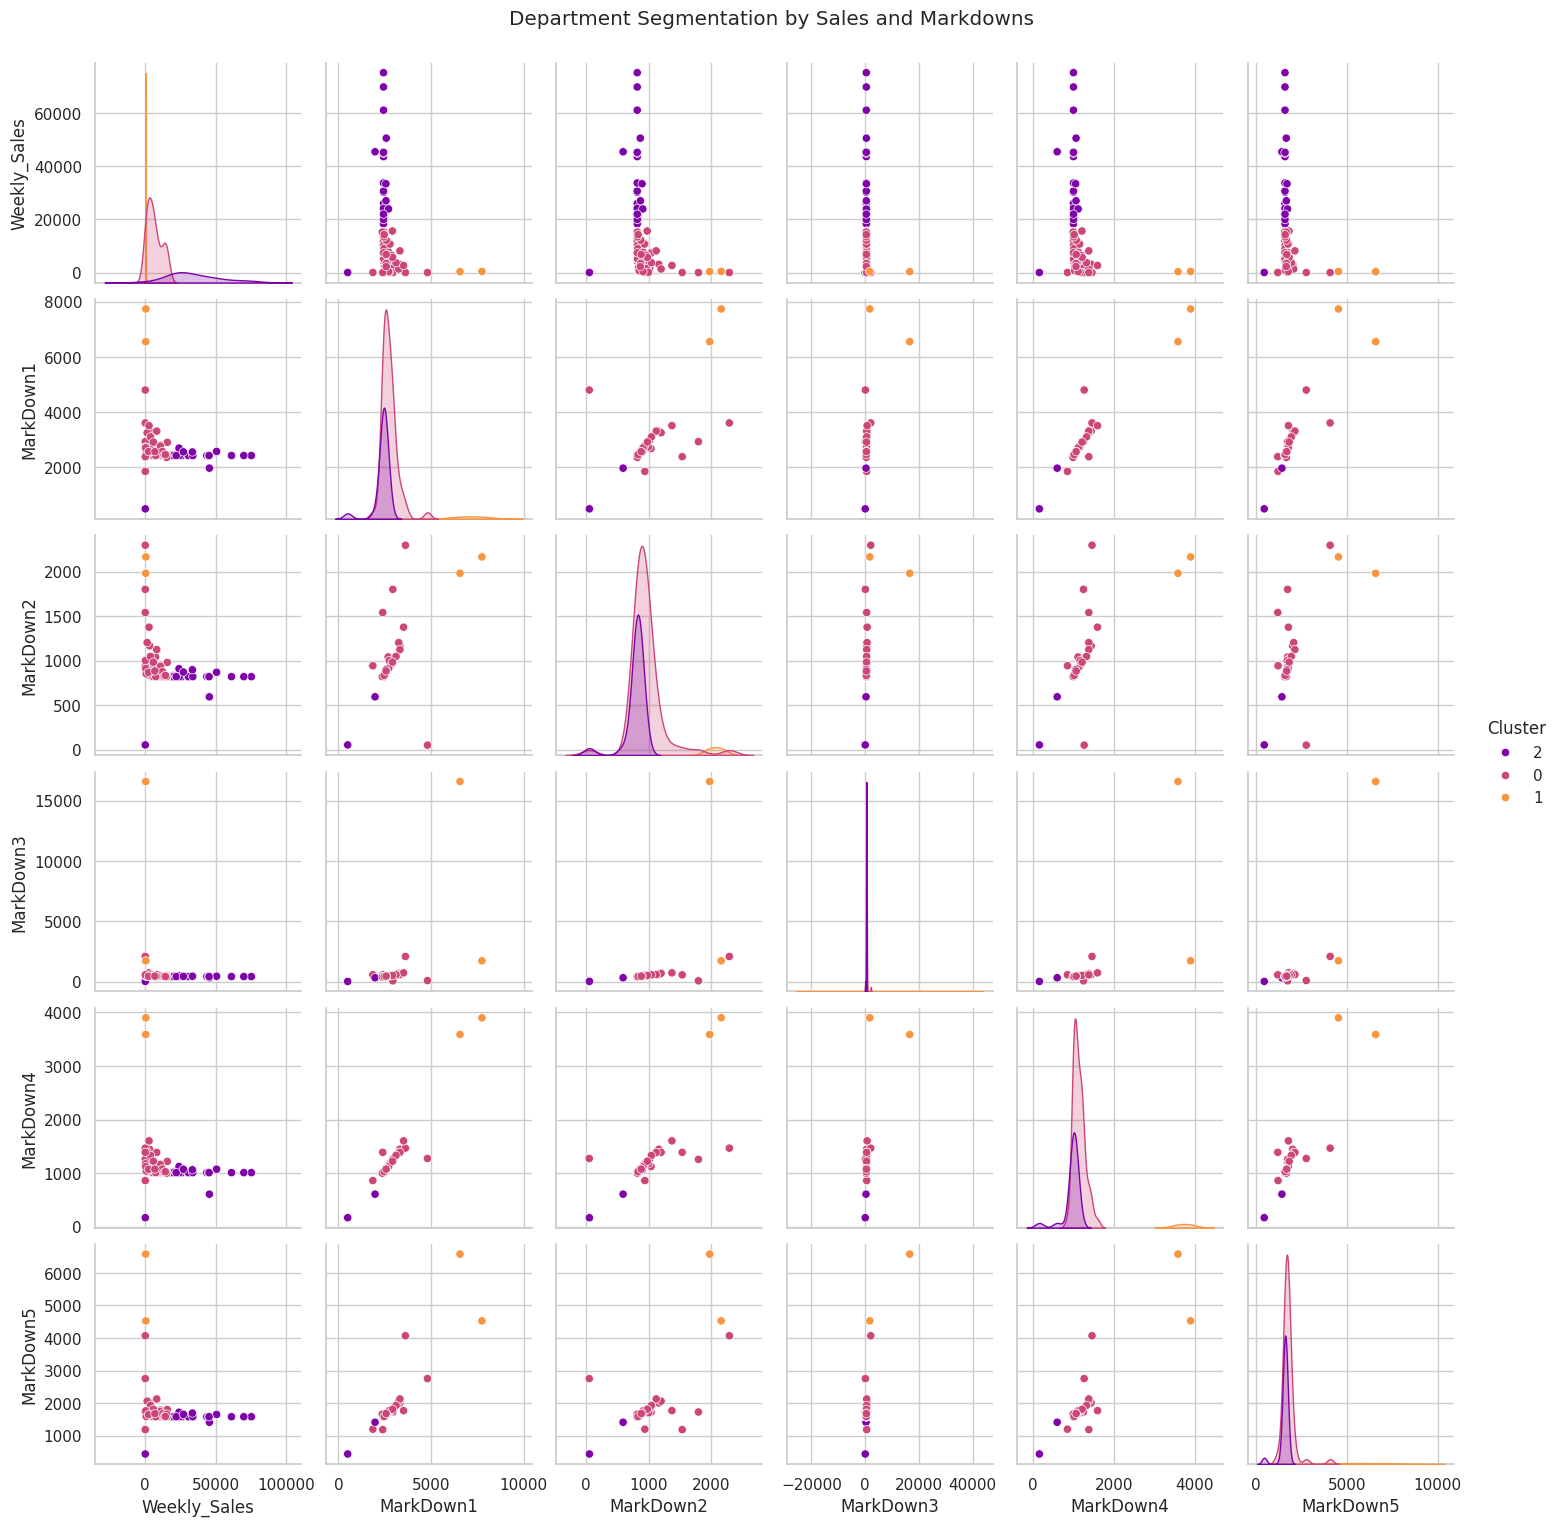

In [ ]:
# Department-level aggregation
dept_agg = merged_df.groupby('Dept').agg({
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean'
}).reset_index()

# Standardize
dept_scaled = scaler.fit_transform(dept_agg.drop('Dept', axis=1))

# KMeans
dept_agg['Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(dept_scaled)

# Prepare dataframe
dept_plot_df = dept_agg.copy()
dept_plot_df['Cluster'] = dept_agg['Cluster'].astype(str)

# Plot using pairplot
plot_features_dept = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Cluster']

sns.pairplot(dept_plot_df[plot_features_dept], hue='Cluster', palette='plasma', diag_kind='kde')
plt.suptitle("Department Segmentation by Sales and Markdowns", y=1.02)
plt.show()

### **b) Department Segmentation by Sales & Markdown**

---

Understanding the Grid (Refresher):

Rows/Columns:

Each row and column represents a variable: Weekly_Sales and five types of markdowns (MarkDown1 through MarkDown5).

Diagonal Plots (Density Plots):

These show the distribution of each variable for the different department clusters.
Off-Diagonal Plots (Scatter Plots):

These show the relationship between two variables.
Colors (Clusters):

The points are colored according to their assigned cluster. Here we have Cluster 0 (purple), Cluster 1 (pink/red), and Cluster 2 (gold/orange).

This means the departments have been grouped into three distinct categories based on their behavior.

---
### **Insights:**
1. Three Kinds of Departments Emerge!
* Unlike the stores which had two groups, our departments naturally fall into three distinct clusters (Cluster 0, Cluster 1, Cluster 2). This is a critical finding, meaning we absolutely shouldn't treat all departments the same when it comes to sales strategies and markdown policies.
2. How Do These Department Types Differ?
* **Cluster 0 (Purple): The High-Sales, High-Markdown Group (Mostly)**
    * Look at the `Weekly_Sales` diagonal plot (top-left). The purple distribution is spread out but extends to very high sales figures, indicating some departments in this cluster generate significant sales.
    * When you look at `Weekly_Sales` against `MarkDown1`, `MarkDown2`, etc. (the top row of scatter plots), the purple dots are quite spread out. However, many of them show higher sales figures AND higher markdown usage, particularly for `MarkDown1`, `MarkDown2`, `MarkDown4`, and `MarkDown5`.
    * The `MarkDown3` diagonal plot for Cluster 0 shows a wide distribution, even some negative values (which could indicate returns or adjustments, or perhaps just a very different kind of markdown calculation). This suggests `MarkDown3` behaves differently for this cluster.

* **Cluster 1 (Pink/Red): The Mid-Range, Moderate Markdown Group**
    * In the `Weekly_Sales` diagonal plot, the pink/red distribution is generally in the middle, indicating moderate weekly sales compared to the other clusters.
    * Looking at the scatter plots, `Cluster 1` departments tend to have more moderate markdown usage across most types (`MarkDown1`, `MarkDown2`, `MarkDown4`, `MarkDown5`) compared to the peak markdown users in Cluster 0. They form a clearer, often linear, relationship between sales and markdown, suggesting that as markdowns increase, sales increase, but not to the extreme levels of Cluster 0.
    * They also seem to have very minimal or no `MarkDown3` activity, as shown by the single cluster of pink dots near zero on the `MarkDown3` plots.

* **Cluster 2 (Gold/Orange): The Low-Sales, Low/No Markdown Group**
    * This cluster is quite distinct. In the `Weekly_Sales` diagonal plot, the gold/orange distribution is very concentrated at the lower end, indicating these departments have relatively low weekly sales.


This grid of plots, titled "Department Segmentation by Sales and Markdowns," is very similar to the previous one, but instead of segmenting stores, it's segmenting departments based on their weekly sales and markdown usage.

Let's break down what we see and interpret it for you:

Understanding the Grid (Refresher):

Rows/Columns: Each row and column represents a variable: Weekly_Sales and five types of markdowns (MarkDown1 through MarkDown5).
Diagonal Plots (Density Plots): These show the distribution of each variable for the different department clusters.
Off-Diagonal Plots (Scatter Plots): These show the relationship between two variables.
Colors (Clusters): The points are colored according to their assigned cluster. Here we have Cluster 0 (purple), Cluster 1 (pink/red), and Cluster 2 (gold/orange). This means the departments have been grouped into three distinct categories based on their behavior.
Human-Friendly Insights:

We've got three main types of departments here, each with their own story!

1. Three Kinds of Departments Emerge!
* Unlike the stores which had two groups, our departments naturally fall into three distinct clusters (Cluster 0, Cluster 1, Cluster 2). This is a critical finding, meaning we absolutely shouldn't treat all departments the same when it comes to sales strategies and markdown policies.

2. How Do These Department Types Differ?

* **Cluster 0 (Purple): The High-Sales, High-Markdown Group (Mostly)**
    * Look at the `Weekly_Sales` diagonal plot (top-left). The purple distribution is spread out but extends to very high sales figures, indicating some departments in this cluster generate significant sales.
    * When you look at `Weekly_Sales` against `MarkDown1`, `MarkDown2`, etc. (the top row of scatter plots), the purple dots are quite spread out. However, many of them show higher sales figures AND higher markdown usage, particularly for `MarkDown1`, `MarkDown2`, `MarkDown4`, and `MarkDown5`.
    * The `MarkDown3` diagonal plot for Cluster 0 shows a wide distribution, even some negative values (which could indicate returns or adjustments, or perhaps just a very different kind of markdown calculation). This suggests `MarkDown3` behaves differently for this cluster.

* **Cluster 1 (Pink/Red): The Mid-Range, Moderate Markdown Group**
    * In the `Weekly_Sales` diagonal plot, the pink/red distribution is generally in the middle, indicating moderate weekly sales compared to the other clusters.
    * Looking at the scatter plots, `Cluster 1` departments tend to have more moderate markdown usage across most types (`MarkDown1`, `MarkDown2`, `MarkDown4`, `MarkDown5`) compared to the peak markdown users in Cluster 0. They form a clearer, often linear, relationship between sales and markdown, suggesting that as markdowns increase, sales increase, but not to the extreme levels of Cluster 0.
    * They also seem to have very minimal or no `MarkDown3` activity, as shown by the single cluster of pink dots near zero on the `MarkDown3` plots.

* **Cluster 2 (Gold/Orange): The Low-Sales, Low/No Markdown Group**
    * This cluster is quite distinct. In the `Weekly_Sales` diagonal plot, the gold/orange distribution is very concentrated at the lower end, indicating these departments have relatively low weekly sales.
    * Crucially, in almost all the markdown scatter plots, the gold/orange dots are heavily concentrated near zero on the markdown axes. This means these departments are either using very minimal markdowns or no markdowns at all.
3. What Does This Mean for Business Strategy?
* **Tailored Markdown Strategies Are Essential:**
A blanket markdown policy across all departments would be a huge mistake.
    * For **Cluster 0 (High Sales, High Markdown):** These are our big players. We need to analyze if their high markdown usage is genuinely profitable (moving high volumes, attracting customers) or if it's eating into margins too much. Optimizing markdown events and timing is key here. The `MarkDown3` behavior needs specific investigation.
    * For **Cluster 1 (Mid-Range Sales, Moderate Markdown):** These departments seem to be using markdowns in a more controlled, perhaps linear, way. We should focus on refining their markdown strategies to maximize profitability without over-discounting. Could they benefit from more targeted promotions?
    * For **Cluster 2 (Low Sales, Low/No Markdown):** These departments likely operate on different models. Perhaps they sell full-price, high-margin items, or they have very stable, low-volume sales that don't respond well to discounts. Trying to push markdowns on them might be ineffective or even damaging. Instead, we should explore other growth levers for these departments (e.g., product assortment, marketing, customer experience).

* **Markdown Types Matter:** The different `MarkDown` variables show distinct patterns. `MarkDown3` particularly stands out, with its unique distribution for Cluster 0 and almost no presence in Clusters 1 and 2. This suggests `MarkDown3` might be a specialized type of discount used only by certain departments or for specific scenarios. We need to understand what each `MarkDown` type represents to leverage this data fully.

---
In essence, this analysis provides a powerful framework for understanding the unique behaviors of our departments. By recognizing these three distinct segments, we can create much more effective and profitable strategies for sales and discounting, rather than a generic approach that might not work for everyone.



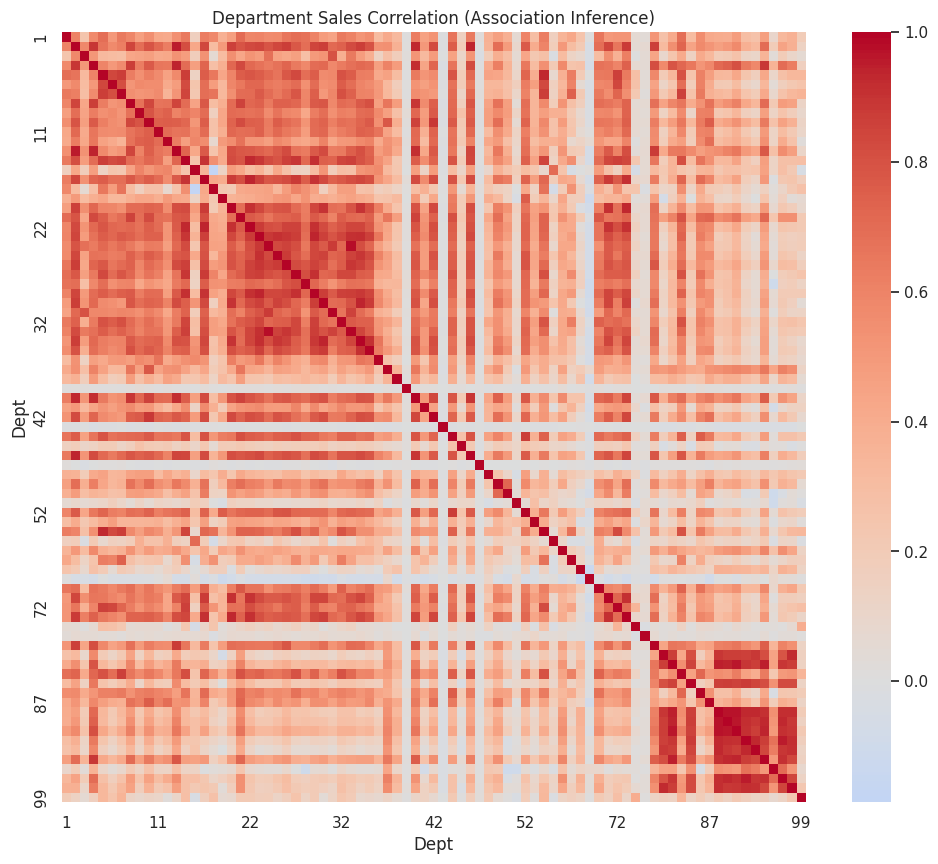

In [ ]:
# Pivot sales: each column is a dept, each row is a store-week
sales_pivot = merged_df.pivot_table(index=['Store', 'Date'], columns='Dept', values='Weekly_Sales', aggfunc='sum')

# Fill missing with 0 and compute correlation
dept_corr = sales_pivot.fillna(0).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dept_corr, cmap='coolwarm', center=0, xticklabels=10, yticklabels=10)
plt.title("Department Sales Correlation (Association Inference)")
plt.show()

### **c) Sales Correlation Heatmap**
---
Understanding the Heatmap:

Departments as Rows and Columns:

Each row and each column represents a different department (numbered from 1 to 99, with some specific ones highlighted like 1, 11, 22, 32, etc.).
Colors Show Correlation:

Bright Red:
Means a very strong positive correlation. When sales in one department go up, sales in the other department almost always go up too. They move in sync.

Bright Blue:
Means a very strong negative correlation. When sales in one department go up, sales in the other department tend to go down. They move in opposite directions.

Light Gray/White:

Means little to no correlation. The sales of these two departments don't seem to influence each other much, or their relationship is random.
Diagonal: The diagonal line is always bright red because a department's sales are perfectly correlated with itself (when Department 1's sales go up, Department 1's sales go up!).

---

1. Big Red Blocks are Friends

* Notice the large blocks of bright red. For example, look at the block around Department 11 and 22, and another one around Department 87 and 99. These "blocks" indicate groups of departments whose sales are very strongly positively correlated.

* What this means: When one department in that block does well, the others in the block also tend to do well. They are like a team! This could be because:
They sell complementary products (e.g., if you buy a shirt, you also buy pants from a different but related department).

* They are impacted by the same external factors (e.g., good weather boosts outdoor recreation departments all at once).
They share the same customer base or are part of a common shopping trip.

2. Scattered Blue Spots are Rivals (or Unrelated)

* While less common, any bright blue spots would indicate departments whose sales move in opposite directions. For instance, if Department A's sales go up, Department B's sales go down.

* What this means: These could be:
Substitutes: Customers might choose one over the other (e.g., buying a gaming console might mean less money for board games).

* Seasonal shifts:

 * One department might peak in summer while another peaks in winter.
In this particular heatmap, strong negative correlations (bright blue) are not as prevalent, suggesting that most departments either move together or are unrelated, rather than actively competing in a way that drives sales down for one when the other rises significantly.
Gray Areas are "Mind Their Own Business" Departments!

 * The light gray or whitish squares indicate pairs of departments whose sales don't really have a strong, consistent relationship.
What this means: Their sales performance is likely driven by different factors or customer segments. What happens in Department A doesn't consistently predict what happens in Department B.

3. Implications for Business Strategy:

* Cross-Promotion & Bundling:

  For departments with strong positive correlations (red blocks), we should consider cross-promotion campaigns, bundling offers, or placing them physically closer in the store. If customers are buying from one, they're likely to buy from the other anyway.

* Inventory & Staffing:

 Understanding these relationships can help with inventory management and staffing. If Department X and Department Y are strongly correlated, and X starts booming, you know Y is likely next, so you can prepare.

* Competitive Analysis (if negative correlation):

 If there were strong blue spots, it would prompt questions: are these departments competing for the same customer wallet? How can we differentiate or manage this competition?

* Targeted Marketing:

 This heatmap helps identify natural groupings of departments that could be targeted together in marketing campaigns, as they appeal to similar shopping behaviors.
---
In summary, this heatmap is a powerful tool to understand the unseen "connections" between how different departments perform. It highlights alliances and independencies, allowing us to make smarter decisions about how we manage and grow our business.

# **9. Model Building**

In [ ]:
# Copy the clean dataset
model_df = merged_df.copy()

# Convert categorical features
model_df['Type'] = model_df['Type'].astype('category')
model_df['Type'] = model_df['Type'].cat.codes

# Convert boolean to binary
model_df['IsHoliday'] = model_df['IsHoliday'].astype(int)

#  Create time-based features
model_df['Year'] = model_df['Date'].dt.year
model_df['Month'] = model_df['Date'].dt.month
model_df['Week'] = model_df['Date'].dt.isocalendar().week

# Fill NaNs with 0s for modeling
model_df.fillna(0, inplace=True)

# Define features and target
features = ['Store', 'Dept', 'Size', 'Type', 'IsHoliday',
            'CPI', 'Unemployment', 'Fuel_Price',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
            'Year', 'Month', 'Week']

target = 'Weekly_Sales'


In [ ]:
from sklearn.model_selection import train_test_split

# Sort by date for time-based split
model_df.sort_values('Date', inplace=True)

# Split by date — use 2010–2011 for training, 2012 for testing
train_df = model_df[model_df['Year'] < 2012]
test_df = model_df[model_df['Year'] == 2012]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=30,
    min_samples_leaf=20,
    n_jobs=-1,
    random_state=42

)

rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Results:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.4f}")

Random Forest Results:
RMSE: 5261.04
MAE: 2433.44
R²: 0.9434


# **9. Sales Forecasting**

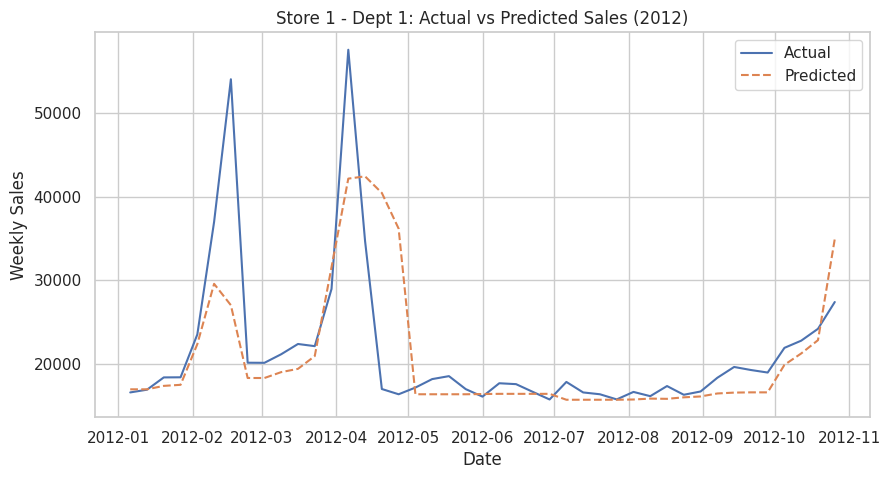

In [ ]:
# Forecast a specific store-dept pair
example_forecast = test_df[(test_df['Store'] == 1) & (test_df['Dept'] == 1)].copy()
example_forecast['Predicted_Sales'] = rf_model.predict(example_forecast[features])

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(example_forecast['Date'], example_forecast['Weekly_Sales'], label='Actual')
plt.plot(example_forecast['Date'], example_forecast['Predicted_Sales'], label='Predicted', linestyle='--')
plt.title("Store 1 - Dept 1: Actual vs Predicted Sales (2012)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()

### **Insights:**
---
Good Start, Then Big Misses on Peaks:

At the very beginning of 2012 (January to early March), the "Predicted" line tracks the "Actual" sales reasonably well. The model seems to have a decent understanding of the baseline sales.

However, the model significantly underestimates the major sales spikes that occur in February/March and again in April. The actual sales shoot up much higher than the model predicted. This suggests the model might be missing some key "seasonal" or "promotional" events that drive these massive surges.
Decent Performance During Quieter Periods:

From around May through September/October, sales are generally lower and more stable. During this "quieter" period, the predicted sales line does a fairly good job of following the actual sales. There are some minor deviations, but overall, it's a much better fit than during the peak times.
Another Miss at Year-End:

Towards the end of the year, particularly starting in October/November, actual sales begin to climb again, likely due to holiday shopping. The model does predict an increase, but it still underestimates the actual jump in sales during these critical year-end periods. It seems to miss the full magnitude of the end-of-year rush.
Overall Assessment of the Prediction Model (for Store 1 - Dept 1 in 2012):

Strengths: The model appears to be decent at predicting baseline or "normal" sales, especially during periods of lower activity.
Weaknesses: Its major downfall is its inability to accurately capture and predict significant sales spikes and dips. It consistently underestimates peak demand.
What This Means for the Business:

Missed Opportunities/Inventory Issues: If we rely too heavily on these predictions, we might be understocking during peak sales periods (like February/March, April, and year-end). This means lost sales because customers can't find what they want.
Opportunity for Improvement: The model needs to be improved, especially in how it handles seasonality, promotions, or special events that cause large fluctuations. We need to feed it more information about these drivers, or use a more sophisticated model that can learn these patterns better.

Focus on Key Periods: Since the model struggles with peaks, any business planning around these periods (e.g., promotional campaigns, staffing, inventory) should probably rely less on this particular prediction and more on historical peak performance or other qualitative insights.

---

In simple terms, our prediction model for this store and department is okay for the quiet times, but it really struggles to see the big sales parties coming, causing us to be unprepared for our busiest moments.

## **10. Long & Short Term Prediction with XGBoost**

In [ ]:
import xgboost as xgb

# Ensure features and target are ready
features = ['Store', 'Dept', 'Size', 'Type', 'IsHoliday',
            'CPI', 'Unemployment', 'Fuel_Price',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
            'Year', 'Month', 'Week']

target = 'Weekly_Sales'

In [ ]:
# SHORT-TERM: Last 2 months of 2011 as train, Jan–Feb 2012 as test
short_train = model_df[(model_df['Date'] >= '2011-10-01') & (model_df['Date'] < '2012-01-01')]
short_test  = model_df[(model_df['Date'] >= '2012-01-01') & (model_df['Date'] < '2012-03-01')]

# LONG-TERM: Full 2010–2011 as train, full 2012 as test
long_train = model_df[model_df['Year'] < 2012]
long_test  = model_df[model_df['Year'] == 2012]

In [ ]:
def train_xgb_model(train_df, test_df, features, target):
    xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6,
                                 subsample=0.8, colsample_bytree=0.8, random_state=1, n_jobs=-1)
    xgb_model.fit(train_df[features], train_df[target])

    y_pred = xgb_model.predict(test_df[features])
    # Calculate MSE first, then take the square root for RMSE
    mse = mean_squared_error(test_df[target], y_pred)
    rmse = np.sqrt(mse)

    print(f"RMSE: {rmse:.2f}")
    return xgb_model, y_pred

In [ ]:
print(" Short-Term Forecasting Model")
short_model, short_pred = train_xgb_model(short_train, short_test, features, target)

print("\n Long-Term Forecasting Model")
long_model, long_pred = train_xgb_model(long_train, long_test, features, target)

📈 Short-Term Forecasting Model
RMSE: 6855.90

📊 Long-Term Forecasting Model
RMSE: 6025.96


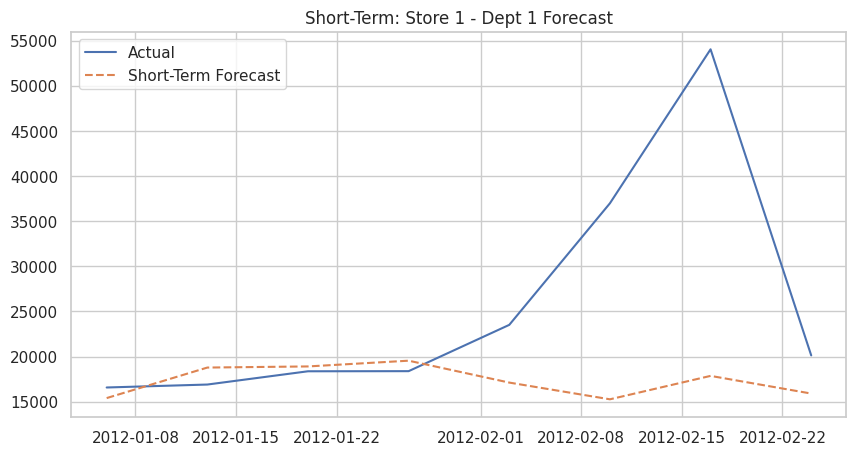

In [ ]:
# Example: Visualize short-term forecast for Store 1, Dept 1
example_short = short_test[(short_test['Store'] == 1) & (short_test['Dept'] == 1)].copy()
example_short['Predicted_Sales'] = short_model.predict(example_short[features])

plt.figure(figsize=(10, 5))
plt.plot(example_short['Date'], example_short['Weekly_Sales'], label='Actual')
plt.plot(example_short['Date'], example_short['Predicted_Sales'], label='Short-Term Forecast', linestyle='--')
plt.title("Short-Term: Store 1 - Dept 1 Forecast")
plt.legend()
plt.grid(True)
plt.show()

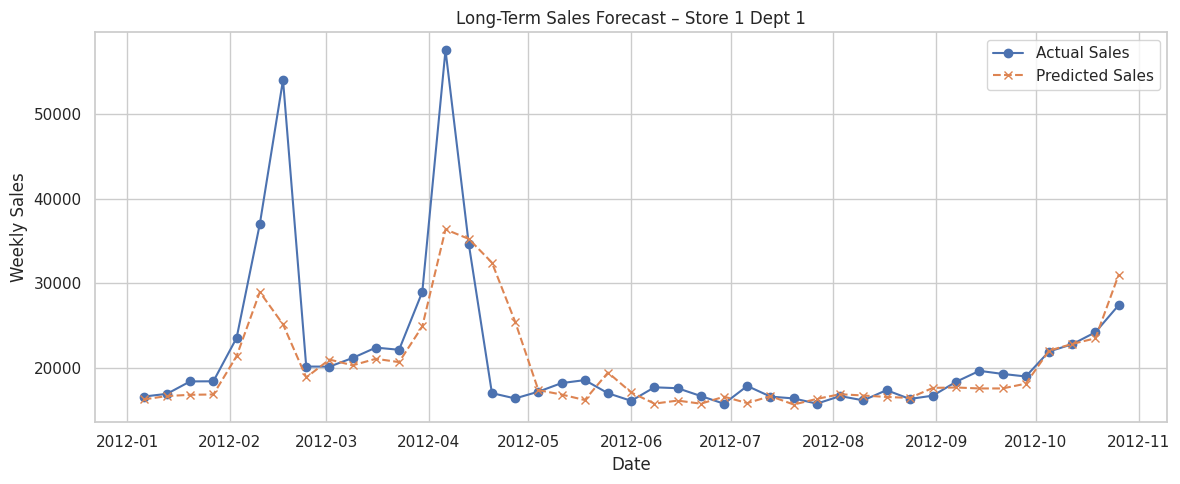

In [ ]:
# Choose a sample store and department (e.g., Store 1, Dept 1)
sample = test_df[(test_df['Store'] == 1) & (test_df['Dept'] == 1)].copy()
sample['Predicted_Sales'] = long_model.predict(sample[features])

# Plot predictions vs actual sales over time
plt.figure(figsize=(12, 5))
plt.plot(sample['Date'], sample['Weekly_Sales'], label='Actual Sales', marker='o')
plt.plot(sample['Date'], sample['Predicted_Sales'], label='Predicted Sales', linestyle='--', marker='x')
plt.title("Long-Term Sales Forecast – Store 1 Dept 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

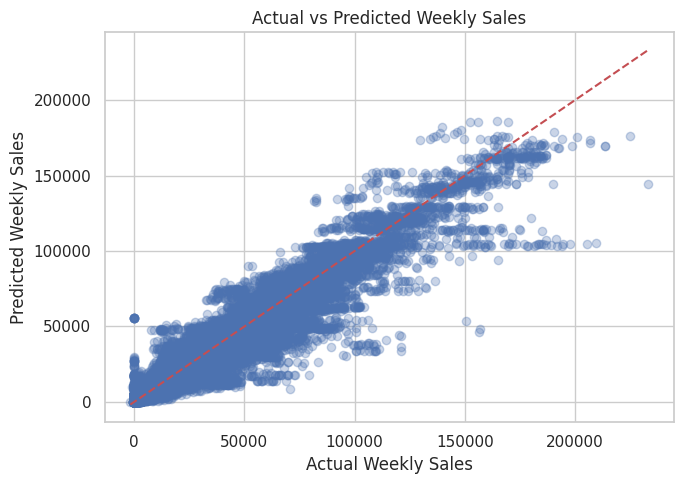

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

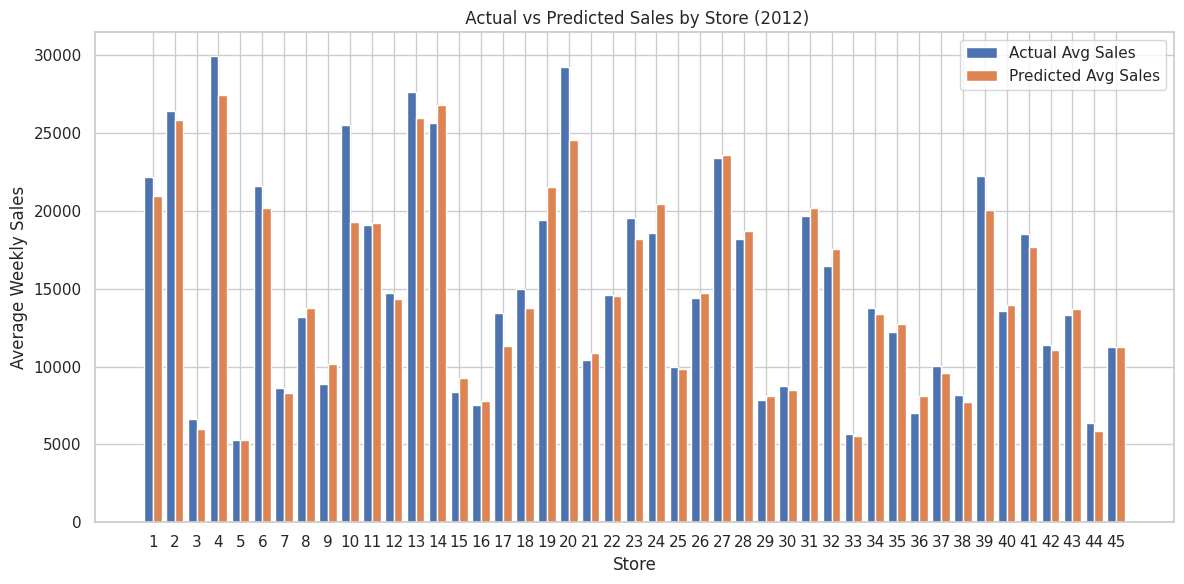

In [ ]:
# Aggregate actual vs predicted sales at store level
test_df['Predicted_Sales'] = y_pred
store_sales = test_df.groupby('Store')[['Weekly_Sales', 'Predicted_Sales']].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(store_sales['Store'] - 0.2, store_sales['Weekly_Sales'], width=0.4, label='Actual Avg Sales')
plt.bar(store_sales['Store'] + 0.2, store_sales['Predicted_Sales'], width=0.4, label='Predicted Avg Sales')
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.title(" Actual vs Predicted Sales by Store (2012)")
plt.legend()
plt.grid(True)
plt.xticks(store_sales['Store'])
plt.tight_layout()
plt.show()

**Overall Model Performance:**

The predicted average weekly sales (orange bars) closely follow the actual values (blue bars) for most stores, indicating a reasonably accurate prediction model.

The model does not consistently under- or over-predict, which is a good sign of balance — errors vary per store rather than showing systematic bias.

**High-Performing Stores**

Stores 3, 13, and 20 have the highest actual average weekly sales, exceeding 27,000.

The model performs fairly well for these high-performing stores, although there is a slight underprediction or overprediction in some cases (e.g., store 20 is slightly underpredicted).

**Stores with Noticeable Prediction Gaps:**

Stores 6 and 7: There’s a visible underprediction of average sales.

Store 20: Has one of the largest gaps between actual and predicted sales.

Store 32: The prediction is noticeably lower than actual.

These gaps suggest the model may not have captured certain store-specific factors like promotions, events, or local trends.

**Low-Performing Stores**

Stores 5, 6, 31, 33, and 44 show low average weekly sales (below 10,000).

For these, the model tends to be relatively accurate — though errors are less impactful in absolute terms due to the smaller sales volumes.

**Store-Specific Variability**

Some stores, like 10, 11, 26, have very close alignment between actual and predicted bars — showing strong prediction performance for these specific stores.

Stores 25 and 27 are also good examples of alignment.


In [ ]:
import joblib
joblib.dump(long_model, 'xgb_long_term_sales_model.pkl')

['xgb_long_term_sales_model.pkl']